## 案例：Haar Cascades 多对象检测

### 案例概要

到目前为止，我们已经讨论了如何使用级联分类器（Cascade Classifiers）执行对象检测，调整参数以获得更好结果的重要性。您会发现：一个级联模型只能用于检测一个对象。如果我们考虑相同的基于虹膜识别的生物特征验证案例研究，我们可以很容易地理解，简单的眼睛检测模型可能不是最佳方法。其背后的原因是，眼睛是检测到的很小的物体，因此模型将需要检查很多小区域以确认是否存在眼睛。在之前的实验结果中看到，在面部区域之外检测到很多眼睛。另一方面，如果考虑人脸检测模型，它将比眼睛大，因此，我们将能够更快，更准确地检测到物体（在这种情况下为正面人脸整体）。在这种情况下，更好的方法是使用组合模型。实现思路如下：

1. 为了检测图像中的人脸，使用人脸检测模型。
2. 为了检测眼睛区域，逐张裁剪每个脸部，对于每个裁剪的脸部，使用眼睛检测模型。
3. 为了进行虹膜识别，对每张检测到眼睛的图片，我们可以执行必要的步骤来裁剪和处理虹膜区域。

使用这种方法的优点是，眼睛检测模型只需要在相对较小的区域中搜索眼睛图像，你应该能很快想到其他适用于类似的特征叠加方法的应用程序。

在本案例中，我们会使用 `cv2.resize` 函数调整图像的大小。该函数非常易于使用，并带有两个参数：您要调整大小的图像和所需的新大小。譬如，如果我们有一个名为 `img` 的图像，并且希望将其尺寸调整为 `100×100` 像素，则可以使用：

`newImg = cv2.resize(img，(100,100))`

### 案例目标

本案例中，我们将使用多个级联来解决眼睛检测问题，而不是直接使用眼睛级联，因为这个方法可以获得更多的潜在优势。您将实现多级联方法，并在使用多级联方法和单级联方法获得的结果之间进行比较。

### 案例详细操作说明

1. 导入必要的 Python 库/模块。
2. 读取图像（`./data/eyes.jpeg`），创建原始图像的拷贝副本，并将其转换为灰度。
3. 加载正面人脸检测（`./data/haarcascade_frontalface_default.xml`）和眼睛级联（`./data/haarcascade_eye.xml`）模型。
4. 使用正面人脸级联模型来检测图像中存在的人脸。提示：多尺度检测函数（`detectMultiScale`）将给出脸部周围的边框的列表作为输出。
5. 遍历检测到的每个面部的边框列表，获取边框坐标来裁剪出图像上的正面人脸部分。
   - 提示：边界框是四个值的列表：`x`，`y`，`w` 和 `h`。`(x，y)` 是边框左上角的坐标，`w` 是宽度，`h` 是边框的高度。
   - 您可以使用简单的 NumPy 数组切片来裁剪脸部。
   - 例如：如果 `image` 上游一个框的值为 `[x，y，w，h]`，则可以使用：`crop = gray[y:y+h, x:x+w]` 对其进行裁剪。
   <img src="./img/12.jfif" width="30%">
6. 对于每个裁剪出来的脸部图像，使用眼睛级联模型检测眼睛。
   - 提示：您可以使用在之前的实验中讨论过的自定义函数完成步骤2-步骤6。
7. 最后，显示输入图像，并在眼睛和面部周围绘制边框。
8. 我们开始第二种方法的测试，直接使用眼睛级联模型检测输入图像中的眼睛，你可以直接使用之前的实验代码。
9. 对于这两种情况，请执行必要的实验以调整参数：`scaleFactor` 和 `minNeighbors`。 您可以使用手动方法通过反复运行整个程序并更改参数来调整效果，更好方法是对两个参数的值范围进行迭代。`scaleFactor` 可以保持为 `1.2` 作为初始值。通常，`minNeighbors` 参数值可以在 `1` 到 `9` 之间变化 —— 然而还是那句话：以您的实际实验结果为准。作为一项可选练习，您可以尝试提及为每次进行的实验获得的 `假阳性` 和 `假阴性` 的数量。这样的定量统计结果使您的结果更具说服力。
10. 使用以上两种方法获得最佳结果后，尝试对比使用这两种方法获得的结果之间的差异。

下图显示了本案例的预期结果：

<img src="./img/13.jfif" width="80%">

### 案例小结

完成本案例后，您了解了级联的详细技术内容以及它们如何实现对象检测。

您还学习了如何使用多个级联，而不是仅一个级联来提高性能。

最后，通过各种实验了解参数对获得的结果质量的影响。

从实验结果可以看出：很明显，采用两次级联检测，通过第一次级联检测裁剪出更为明确的对象，排除了图像中其它因素的干扰。从而，在第二次应用眼睛检测级联模型是，只需要在被裁剪出来的正面人脸图像上进行眼睛检测，能实现更为精确的检测结果。以下为完成案例后的两种方法对比图 ——

<img src="./img/eyes-combined-result-1-Copy1.png" width="30%" align="left"><img src="./img/eyes-combined-result-2-Copy1.png" width="30%">

### 案例答案

In [1]:
# 导入必要的库
import cv2                       # 导入OpenCV
import numpy as np               # 导入numPy    
import matplotlib.pyplot as plt  # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

In [2]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab5/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

In [3]:
def detectionUsingCascades(imageFile, cascadeFile1, cascadeFile2):

    """这里是步骤2-步骤6的自定义的函数利用级联模型进行目标检测。
       该函数接受图像文件和级联模型文件的路径作为输入，并返回
       围绕检测到的对象实例的边框列表。"""

    # Step 2 – 加载图片
    # 使用cv2.imread函数加载图像
    image = cv2.imread(imageFile)
    
    # 创建原始图像的拷贝副本
    imageCopy = image.copy()

    # Step 2 – 将图片从BGR转换为灰度
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3 – 加载 haarCascade 正面人脸检测与眼睛检测两个模型
    # 如前所述，cv2.CascadeClassifier函数使用XML文件的路径作为输入
    # 而该路径，正好是我们的自定义函数 detectionUsingCascades 的第二/第三个输入参数
    # 分别是：cascadeFile1, cascadeFile2
    haarCascade1 = cv2.CascadeClassifier(cascadeFile1)
    haarCascade2 = cv2.CascadeClassifier(cascadeFile2)

    # Step 4 – 执行正面人脸多尺度检测
    # 使用正面人脸级联模型来检测图像中存在的人脸
    detectedObjects = haarCascade1.detectMultiScale(gray, 1.2, 9)

    # Step 5 – 遍历检测到的人脸的边框列表中的每一张图像
    # 获取边框坐标来裁剪出图像上的正面人脸部分
    for bbox in detectedObjects:
        
        # 每个bbox都是一个矩形，表示被检测对象（人脸）周围的边框
        x, y, w, h = bbox
        # 为了与眼睛检测的边框区分颜色，这里使用BRG红色绘制
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 3)
        
        # 裁剪出图像中被检测出正面人脸的区域
        # 使用imageCopy拷贝一份裁剪后的图像拷贝
        crop = gray[y:y+h, x:x+w]
        imgCrop = imageCopy[y:y+h, x:x+w]
        
        # 将原始裁剪图像保存在本地存储上，您可以随时在目录下查看
        cv2.imwrite("./result/crop.png",imgCrop)
        
        # Step 6 – 使用眼睛检测模型，在裁剪后的正面人脸图片上进一步检测图像中存在的眼睛
        cropDetectedObjects = haarCascade2.detectMultiScale(crop, 1.2, 2)
        
        # 遍历检测到的眼睛的边框列表中的每一张图像
        for bbox2 in cropDetectedObjects:
            
            # 每个bbox2都是一个矩形，表示被检测对象（眼睛）周围的边框
            X, Y, W, H = bbox2
            # 为了与眼睛检测的边框区分颜色，这里使用BRG蓝色绘制
            cv2.rectangle(image, (x+X,y+Y), (x+X+W, y+Y+H), (255,0,0), 3)

    # Step 6 – 显示输出

    # cv2.imshow("Object Detection", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    
    # 将完成人脸与眼睛检测的图像保存在本地存储上，您可以随时在目录下查看
    cv2.imwrite(result_path+"eyes-combined-result-1.png",image) 
    
    plt.imshow(image[:,:,::-1])                  # 将图像从 BGR 转换为 RGB
    plt.title('Object Detection')                # 指定输出图像的标题
    plt.show()                                   # 显示图像

    # Step 6 – 返回围绕检测到的对象实例的边框列表
    return detectedObjects

根据自定义函数 `detectionUsingCascades`，按顺序输入原始图像、正面人脸检测模型路径、眼睛检测级联模型路径，执行函数。实现检测图像的输出。

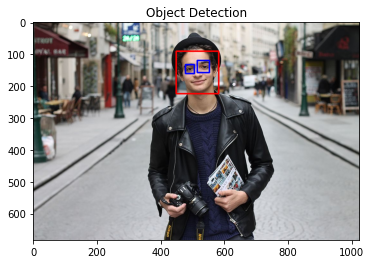

In [4]:
eyeDetection = detectionUsingCascades("./data/eyes.jpeg",
                     "./data/haarcascade_frontalface_default.xml",
                     "./data/haarcascade_eye.xml")

以下引用使用之前的实验代码 ——

In [5]:
# 这是一个自定义函数，负责使用 haarCascade 模型进行目标检测
# 该函数以图像文件和Cascades 模型文件的路径，作为输入，并返回围绕检测到的对象实例的边框
def detectionUsingCascades2(imageFile, cascadeFile):

    # Step 1 – 加载图片
    # 使用cv2.imread函数加载图像
    image = cv2.imread(imageFile)

    # Step 2 – 将图片从BGR转换为灰度
    # 这里要注意的一点是，如果图像已经是灰度图像，则不应再对其进行转换
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3 – 加载 haarCascade模型
    # 如前所述，cv2.CascadeClassifier函数将XML文件的路径作为输入
    # 而该路径，正好是我们的自定义函数 detectionUsingCascades 的第二个输入参数
    haarCascade = cv2.CascadeClassifier(cascadeFile)

    # Step 4 – 执行多尺度检测
    # 这里，重要的是要注意 detectedObjects 只是一个检测到的对象的边框列表
    # 另外，注意我们已经静态指定了参数的值 - scaleFactor和minNeighbors（1.2, 2）
    # 您可以手动调整这些值以获得最佳结果(我们尝试的最佳结果是调整为1.1, 35)
    # 更完善的应用程序将显示不同参数值的一组结果，并让用户从多个结果中选择一个
    detectedObjects = haarCascade.detectMultiScale(gray, 1.2, 9)

    # Step 5 – 勾画检测边框
    # 使用cv2.rectangle函数绘制边界框：
    for bbox in detectedObjects:
        # 每个 bbox 都是一个矩形，表示被检测对象周围的边框
        x, y, w, h = bbox
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 3)

    # Step 6 – 输出显示
    # 显示带有在检测到的对象上绘制的边框的图像：
    
    #cv2.imshow("Object Detection", image)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    # 将完成眼睛检测的图像保存在本地存储上，您可以随时在目录下查看
    cv2.imwrite(result_path+"eyes-combined-result-2.png",image) 

    # 由于opencv默认以BGR格式加载，因此我们调整参数，以RGB格式显示
    # 完成转换后，显示图片
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    # Step 7 – 返回边框
    return detectedObjects

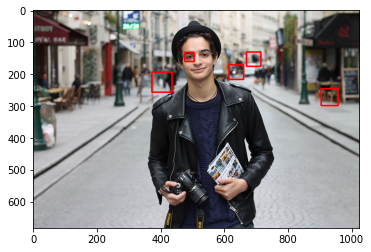

In [6]:
eyeDetection = detectionUsingCascades2("./data/eyes.jpeg", 
                                       "./data/haarcascade_eye.xml")